# Import Libraries

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import joblib

In [43]:
# Loading data
df = pd.read_csv("Dataset/TelcoCustomerChurn.csv")

## Understanding the data

In [44]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df.shape

(7043, 21)

## Bar Chart: Churn with Border

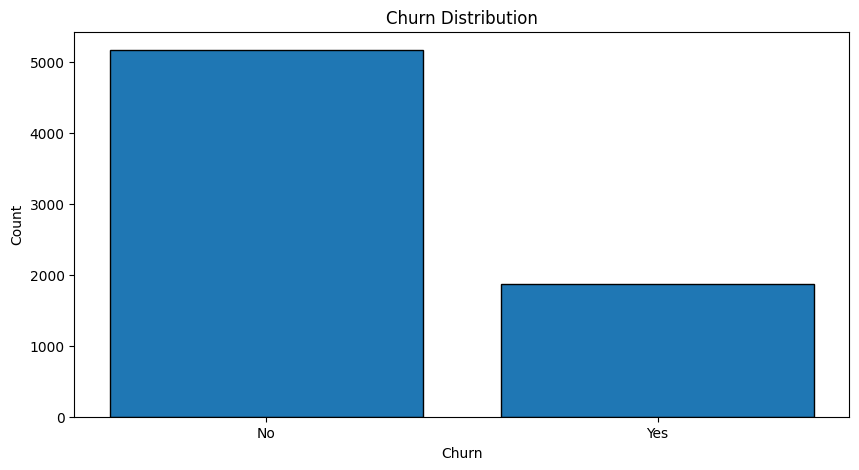

In [46]:
plt.figure(figsize=(10, 5))
counts = df["Churn"].value_counts()
plt.bar(counts.index, counts.values, edgecolor="black")   # border
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

## Bar Chart: Gender with Border

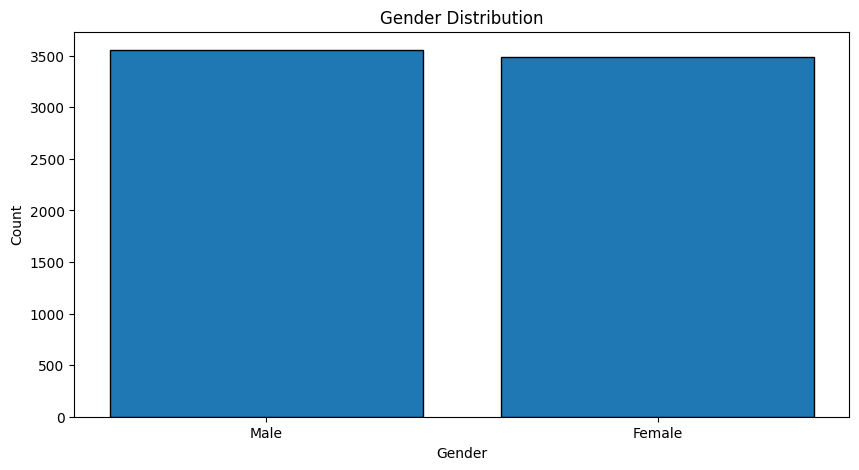

In [47]:
plt.figure(figsize=(10, 5))
gender_counts = df["gender"].value_counts()
plt.bar(gender_counts.index, gender_counts.values, edgecolor="black")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Histogram: Tenure with Border

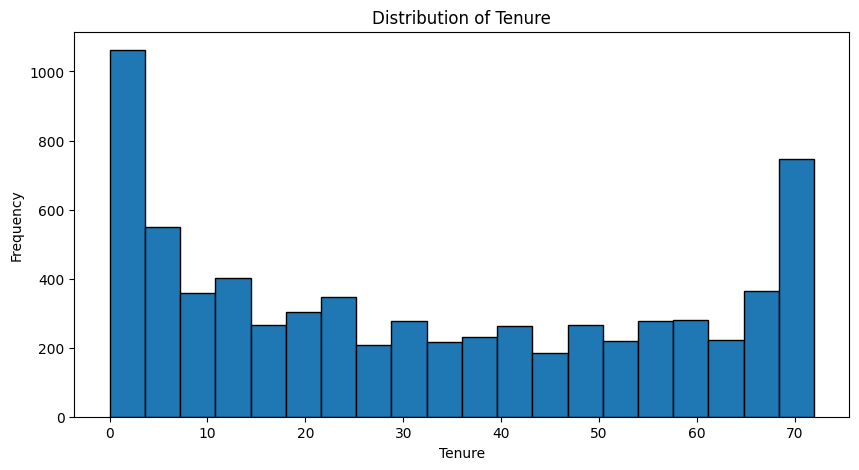

In [48]:
plt.figure(figsize=(10, 5))
plt.hist(df["tenure"], bins=20, edgecolor="black")   # border
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

## Histogram: Monthly Charges with Border

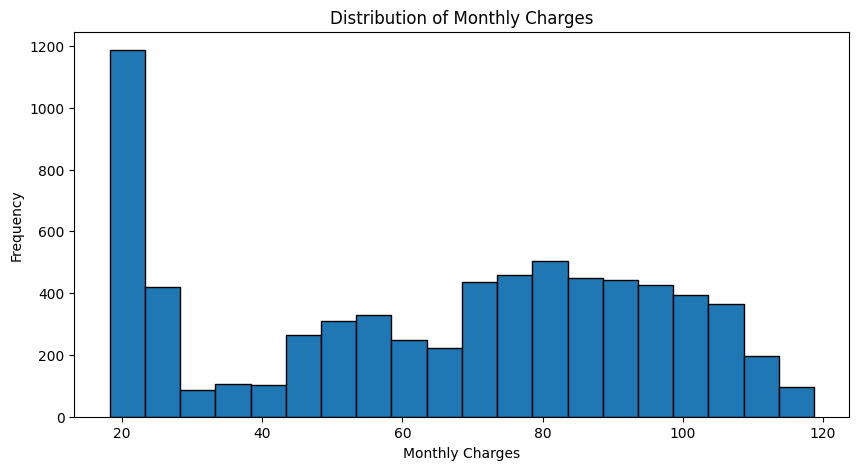

In [49]:
plt.figure(figsize=(10, 5))
plt.hist(df["MonthlyCharges"], bins=20, edgecolor="black")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

## Heatmap Korelasi dengan Nilai per Blok

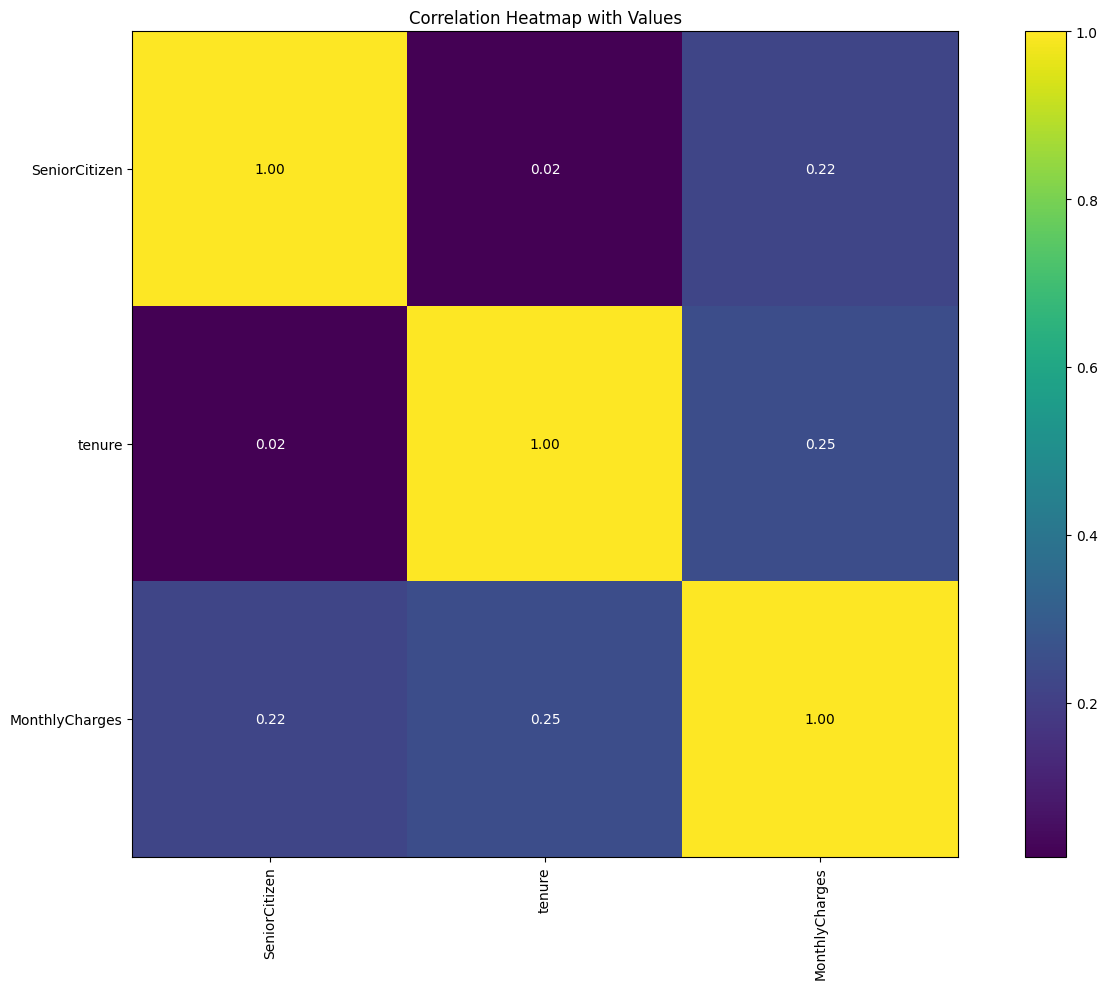

In [50]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()

plt.figure(figsize=(14, 10))

# Heatmap
heatmap = plt.imshow(corr, cmap="viridis")
plt.colorbar()

# Set ticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Tambahkan nilai korelasi di setiap blok
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        plt.text(
            j, i, f"{value:.2f}",
            ha="center", va="center",
            color="black" if abs(value) > 0.5 else "white"
        )

plt.title("Correlation Heatmap with Values")
plt.tight_layout()
plt.show()

In [51]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
# Drop customerID column
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])

In [54]:
df.shape

(7032, 20)

In [55]:
# Split features
X = df.drop(columns=["Churn"])
y = df["Churn"].map({"Yes": 1, "No": 0})  # convert to 0/1

In [56]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "bool"]).columns

numeric_features, categorical_features

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'))

## Visualisasi Fitur Numerik Sebelum Scaling

<Figure size 1200x600 with 0 Axes>

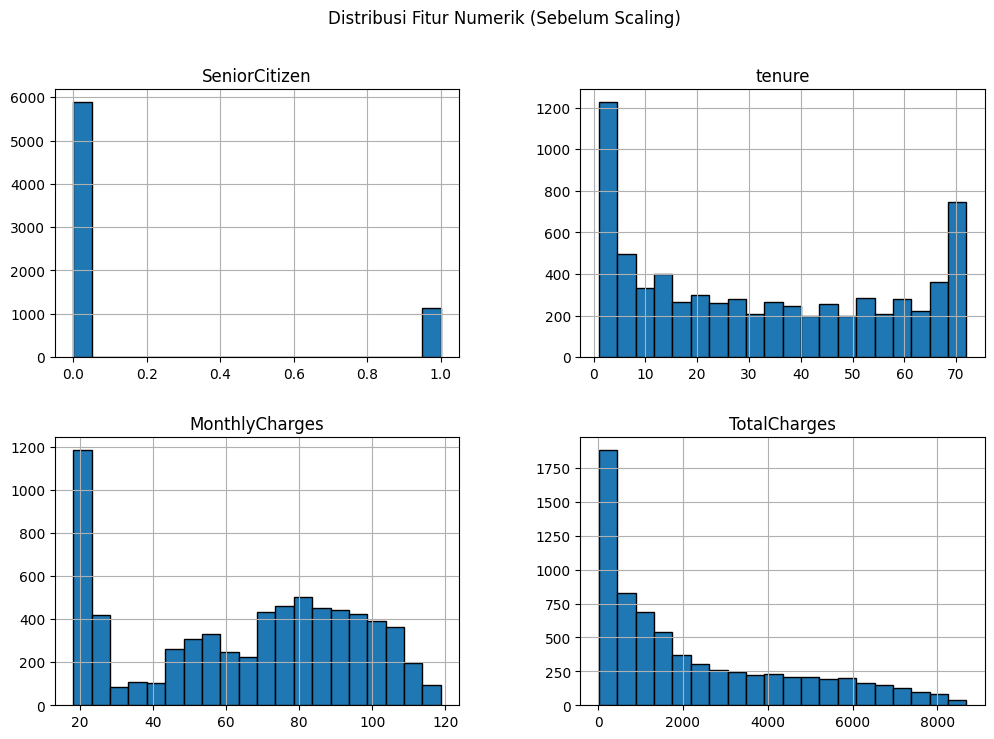

In [57]:
plt.figure(figsize=(12, 6))
df[numeric_features].hist(bins=20, edgecolor="black", figsize=(12, 8))
plt.suptitle("Distribusi Fitur Numerik (Sebelum Scaling)")
plt.show()

## Visualisasi Fitur Kategorikal (Countplot)

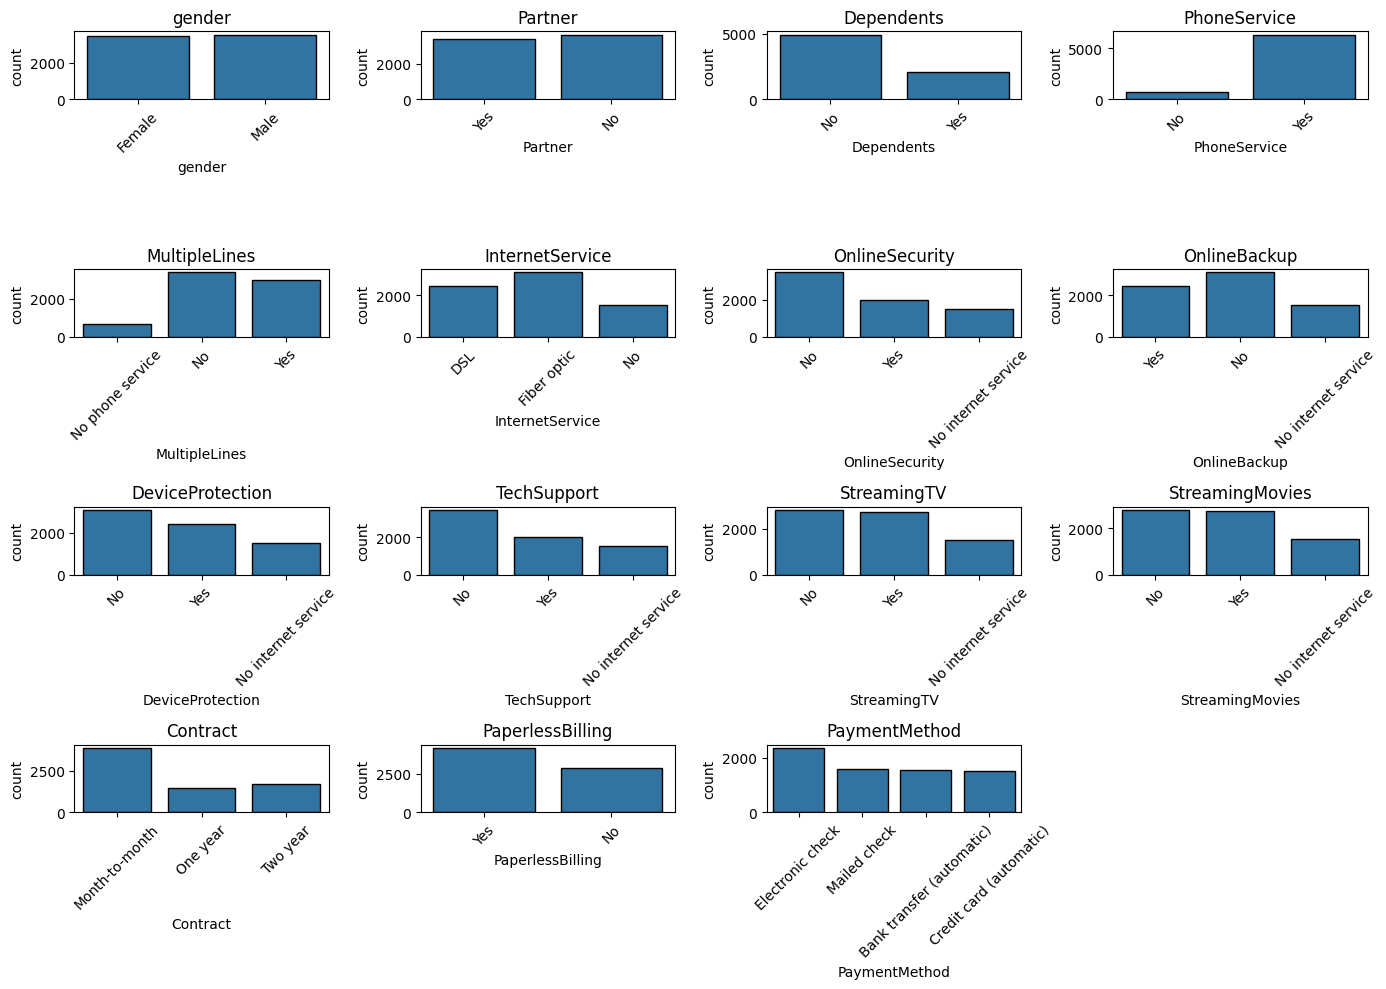

In [58]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, edgecolor="black")
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()


## Visualisasi Hasil OneHotEncoder (Jumlah Fitur Baru)

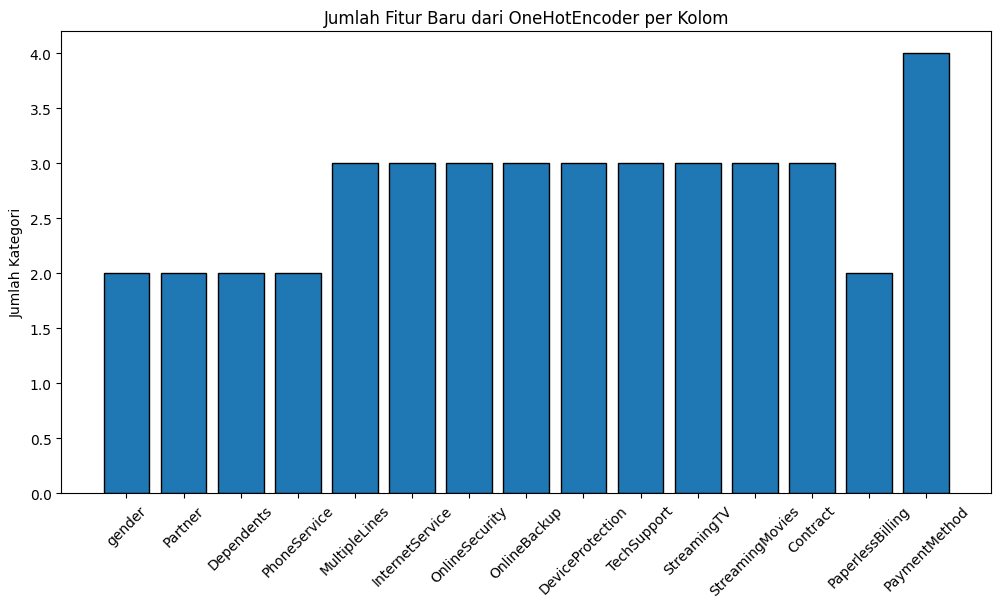

In [59]:
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(df[categorical_features])

# Plot jumlah kategori per fitur
plt.figure(figsize=(12, 6))
num_categories = [len(cats) for cats in ohe.categories_]
plt.bar(categorical_features, num_categories, edgecolor="black")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Kategori")
plt.title("Jumlah Fitur Baru dari OneHotEncoder per Kolom")
plt.show()


In [60]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]
)


## Visualisasi Hasil Scaling (StandardScaler)

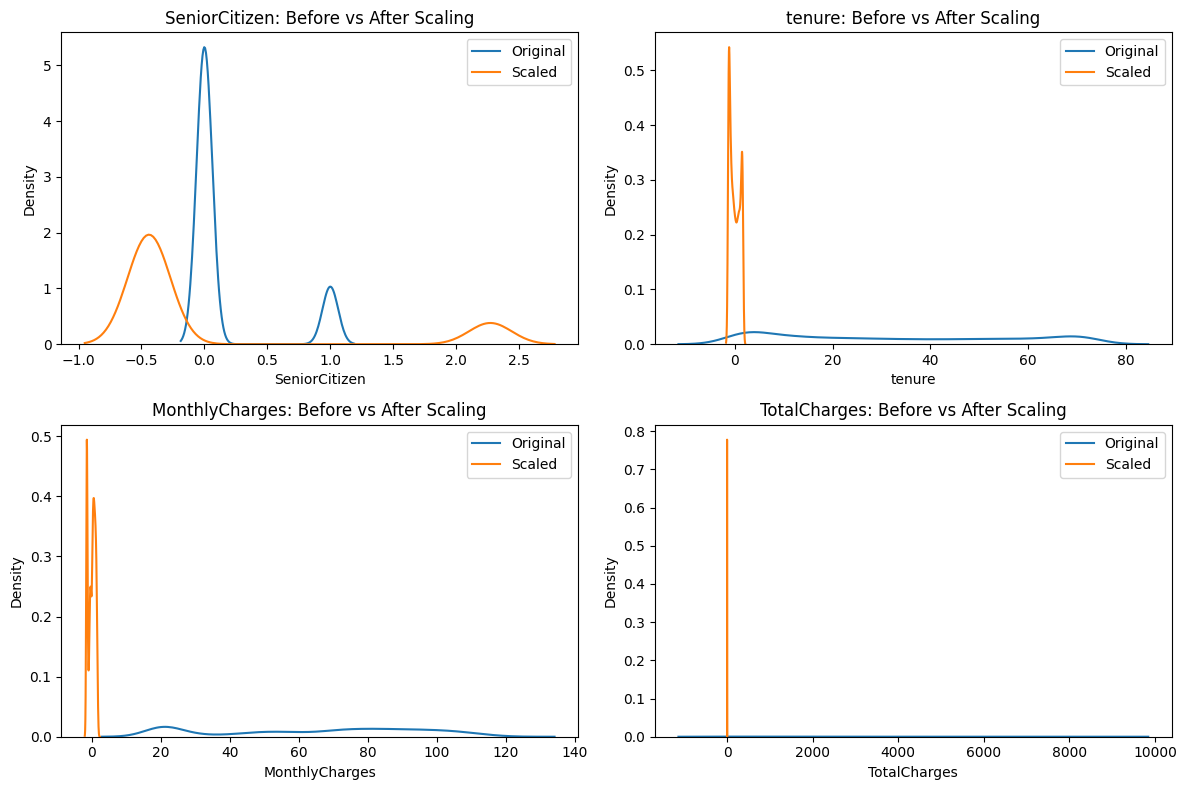

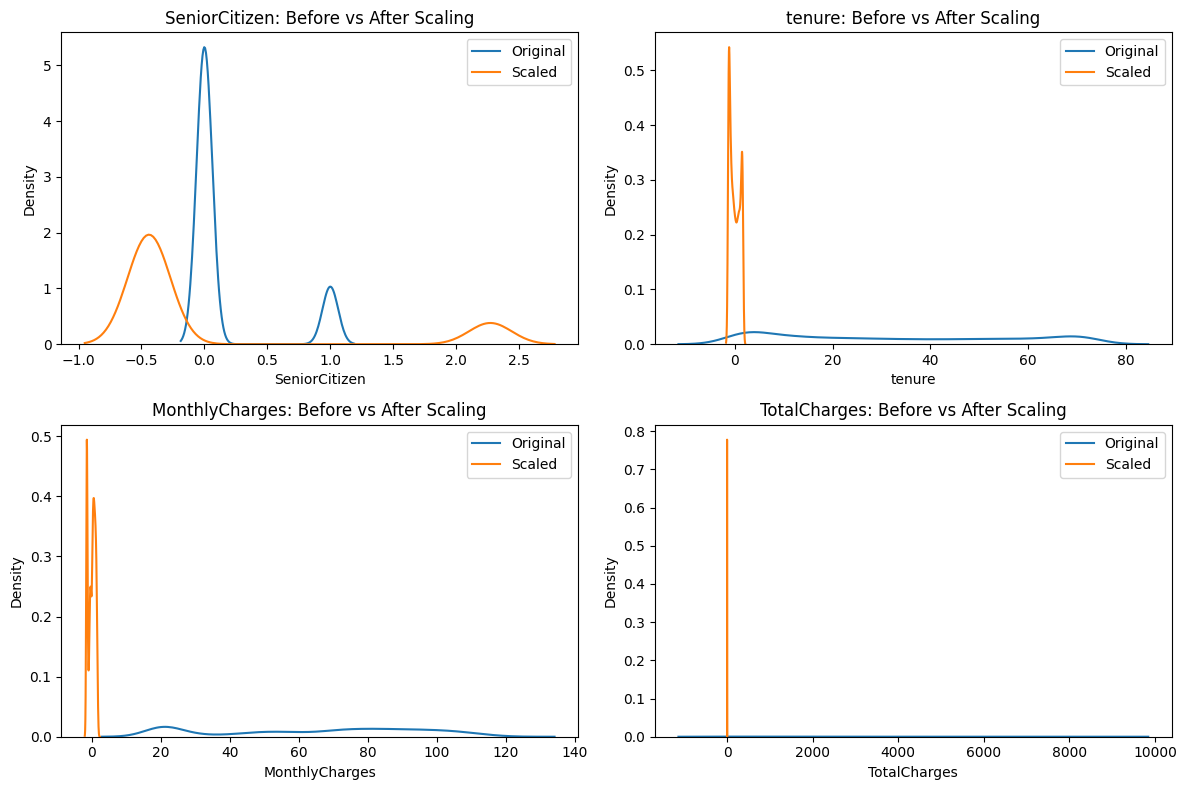

In [61]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[numeric_features])
scaled_df = pd.DataFrame(scaled, columns=numeric_features)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), numeric_features):
    sns.kdeplot(df[col], ax=ax, label="Original")
    sns.kdeplot(scaled_df[col], ax=ax, label="Scaled")
    ax.set_title(f"{col}: Before vs After Scaling")
    ax.legend()

plt.tight_layout()
plt.show()


scaler = StandardScaler()
scaled = scaler.fit_transform(df[numeric_features])
scaled_df = pd.DataFrame(scaled, columns=numeric_features)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), numeric_features):
    sns.kdeplot(df[col], ax=ax, label="Original")
    sns.kdeplot(scaled_df[col], ax=ax, label="Scaled")
    ax.set_title(f"{col}: Before vs After Scaling")
    ax.legend()

plt.tight_layout()
plt.show()


## Visualisasi Output Preprocess (Shape Visualization)

In [68]:
preprocess.fit(X)

X_transformed = preprocess.transform(X)

num_cols = numeric_features

cat_cols = preprocess.named_transformers_["cat"].get_feature_names_out(categorical_features)

all_feature_names = list(num_cols) + list(cat_cols)

df_preprocessed = pd.DataFrame(X_transformed.toarray() 
                               if hasattr(X_transformed, "toarray") 
                               else X_transformed,
                               columns=all_feature_names)

df_preprocessed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.440327,0.064303,-0.260878,-0.173740,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.440327,-1.239504,-0.363923,-0.959649,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.440327,0.512486,-0.747850,-0.195248,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.440327,-1.239504,0.196178,-0.940457,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


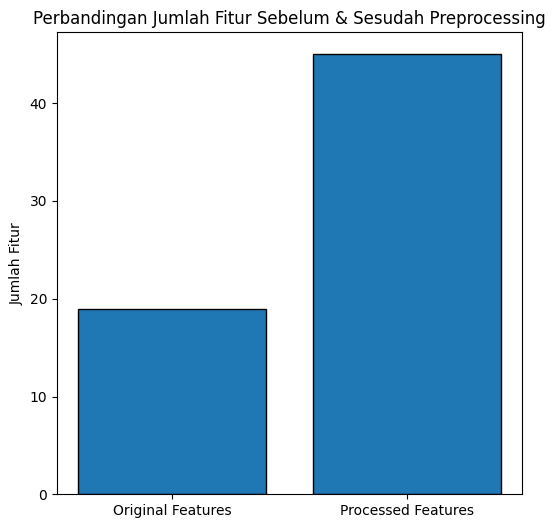

In [63]:
preprocess.fit(X)

# Get final number of features
num_final_features = (
    preprocess.named_transformers_["num"].named_steps["scaler"].scale_.shape[0] +
    sum(len(c) for c in preprocess.named_transformers_["cat"].categories_)
)

plt.figure(figsize=(6, 6))
plt.bar(["Original Features", "Processed Features"], 
        [X.shape[1], num_final_features], 
        edgecolor="black")
plt.title("Perbandingan Jumlah Fitur Sebelum & Sesudah Preprocessing")
plt.ylabel("Jumlah Fitur")
plt.show()


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [65]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7256574271499645
ROC AUC: 0.8351344145860403

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [66]:
joblib.dump(clf, "churn_model.joblib")

['churn_model.joblib']